In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def make_features(df):
    #df = df.loc[pd.notnull(df.values)]
    
    df['code/files'] = df['code_lines']/df['n_pyfiles']
    df['comment/code'] = df['comment_lines']/df['code_lines']
    df['test/code'] = df['test_lines']/df['code_lines']
    df['readme/code'] = df['readme_lines']/df['code_lines']
    df['docstring/code'] = df['docstring_lines']/df['code_lines']
    
    try:
        df['commits/code'] = df['n_commits']/df['code_lines']
    except:
        print('couldnt find n_commits')
    
    for p in ['E1','E2','E3','E4','E5','E7','E9','W1','W2','W3','W5','W6']:
        df['%s/code'%p] = df[p]/df['code_lines']
        
    return df.dropna(how='any').drop_duplicates()

In [3]:
names = ['url', 'n_pyfiles', 'code_lines', 'comment_lines', 'docstring_lines',
         'test_lines','readme_lines', 'n_commits', 'commits_per_time', 'n_stars', 'n_forks', 'E1','E2','E3',
         'E4','E5','E7','E9','W1','W2','W3','W5','W6']

df_good = pd.read_csv('repo_data/top_stars_stats_Python.txt', names=names)
df_good = make_features(df_good)
df_good.tail()

,url,n_pyfiles,code_lines,comment_lines,docstring_lines,test_lines,readme_lines,n_commits,commits_per_time,n_stars,...,E3/code,E4/code,E5/code,E7/code,E9/code,W1/code,W2/code,W3/code,W5/code,W6/code
1421,https://api.github.com/repos/blampe/IbPy,67,8288,888,839,0,37,30,82.000000,807,...,0.006636,0.000845,0.045970,0.000000,0.0,0.0,0.008084,0.002413,0.0,0.001327
1422,https://api.github.com/repos/peterbe/mincss,11,1866,275,66,373,65,30,66.533333,806,...,0.000536,0.003215,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.009110
1423,https://api.github.com/repos/miguelgrinberg/py...,52,6306,359,853,2807,99,30,35.633333,806,...,0.000000,0.002854,0.002537,0.000793,0.0,0.0,0.000000,0.000159,0.0,0.000476
1424,https://api.github.com/repos/marcosfede/algori...,225,11769,1230,2319,515,265,30,13.833333,807,...,0.001444,0.000340,0.012151,0.005098,0.0,0.0,0.001614,0.000085,0.0,0.001275
1425,https://api.github.com/repos/dropbox/pyannotate,28,5108,679,1052,2531,93,30,7.266667,806,...,0.003132,0.000392,0.035043,0.000000,0.0,0.0,0.000196,0.000000,0.0,0.000000


In [4]:
names = ['url', 'n_pyfiles', 'code_lines', 'comment_lines', 'docstring_lines',
         'test_lines','readme_lines','E1','E2','E3',
         'E4','E5','E7','E9','W1','W2','W3','W5','W6']
df_bad = pd.read_csv('repo_data/bottom_stars_stats_Python_local.txt', names=names)
df_bad = make_features(df_bad);
df_bad.tail()

couldnt find n_commits


,url,n_pyfiles,code_lines,comment_lines,docstring_lines,test_lines,readme_lines,E1,E2,E3,...,E3/code,E4/code,E5/code,E7/code,E9/code,W1/code,W2/code,W3/code,W5/code,W6/code
1152,bottom_repos/Inteligencia-Artificial,37,8647,637,1444,0,0,2429,1660,312,...,0.036082,0.002776,0.035966,0.040823,0.0,0.000000,0.071932,0.000925,0.0,0.000347
1157,bottom_repos/func,166,29006,2993,4156,5558,16,381,6648,761,...,0.026236,0.002413,0.031063,0.010618,0.0,0.000000,0.000000,0.000000,0.0,0.008447
1158,bottom_repos/crimcomp,19,884,169,24,17,1,6,38,37,...,0.041855,0.001131,0.087104,0.026018,0.0,0.188914,0.014706,0.004525,0.0,0.000000
1159,bottom_repos/kaggle_LSHTC,1,93,3,0,0,0,2,26,1,...,0.010753,0.000000,0.096774,0.010753,0.0,0.688172,0.161290,0.010753,0.0,0.000000
1160,bottom_repos/maya-tdd-toolkit-sampleproject,5,93,10,0,17,0,0,2,2,...,0.021505,0.053763,0.096774,0.000000,0.0,0.000000,0.107527,0.043011,0.0,0.010753


In [5]:
fontsize=14
for p in ['code/files','comment/code','test/code','readme/code','docstring/code']:
    plt.figure(figsize=(12,8))
    plt.plot(df_good['code_lines'], df_good[p], '.', label='good')
    plt.plot(df_bad['code_lines'], df_bad[p], '.', label='bad')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('code_lines',fontsize=fontsize)
    plt.legend()
    plt.ylabel(p, fontsize=fontsize)
    plt.savefig('images/%s.png'%p.replace('/','_'))
    plt.close()
    
for p in ['E1','E2','E3','E4','E5','E7','E9','W1','W2','W3','W5','W6']:
    plt.figure(figsize=(12,8))
    plt.plot(df_good['code_lines'], df_good['%s/code'%p], '.', label='good')
    plt.plot(df_bad['code_lines'], df_bad['%s/code'%p], '.', label='bad')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('code_lines', fontsize=fontsize)
    plt.ylabel(p, fontsize=fontsize)
    plt.legend()
    plt.savefig('images/%s.png'%p.replace('/','_'))
    plt.close()

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


# One-class SVM

In [14]:
from sklearn.preprocessing import StandardScaler
features = ['code/files','comment/code','test/code','readme/code','docstring/code',
            'E1/code','E2/code','E3/code',
            'E4/code','E5/code','E7/code',
            'W1/code','W2/code','W3/code','W6/code','code_lines']

# log data, really useful
X = np.log10(df_good[features])
Xb = np.log10(df_bad[features])

# replace log10(0) values with minimum - 2 (2 orders of mag lower)
X_join = pd.concat([X, Xb], axis=0)
fillna = {}
for c in X_join.columns:
    minval = np.floor(np.min(X_join.loc[X_join[c] > -np.inf, c].values) - 1)
    X.loc[X[c] == -np.inf, c] = minval
    X.loc[X[c] == np.inf, c] = minval
    Xb.loc[Xb[c] == -np.inf, c] = minval
    Xb.loc[Xb[c] == np.inf, c] = minval    

# standardize
scaler = StandardScaler()
scaler.fit(pd.concat([X, Xb], axis=0)) # need to scale over all X+Xb data together!
X = scaler.transform(X)
Xb = scaler.transform(Xb)

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


(1032, 258, 682, 171)

In [141]:
# try to maximize recall whilst including as few background samples as possible
def focal_score(X_test, Xb_train, nu, gamma):
    y_pred_test = clf.predict(X_test)
    y_pred_background = clf.predict(Xb_train)

    # recall
    recall = len(np.where(y_pred_test == 1)[0])/float(len(X_test))
    
    # fraction of background samples with a positive classification
    background_focal_frac = len(np.where(y_pred_background == 1)[0])/float(len(Xb_train))
    
    try:
        score = recall**2 / background_focal_frac
    except ZeroDivisionError:
        print("recall=%f, background_focal_frac=%f, nu=%f, gamma=%f"%(recall, background_focal_frac, nu, gamma))
        score = 0
    
    return score

def random_train_test_split(X, train_frac = 0.8):
    N = len(X)
    rN = np.arange(0, N)
    np.random.shuffle(rN)  # randomly shuffle data
    train_i, test_i = rN[0: int(train_frac*N)], rN[int(train_frac*N):]
    
    X_train, X_test = X[train_i], X[test_i]
    return X_train, X_test

In [142]:
from sklearn import svm
from sklearn import metrics
nu = [0.1, 0.2, 0.4, 0.6, 0.8, 1]  # 0-1 range
loggamma = [-5, -4, -3, -2, -1, 0, 1]
n_cv = 3

In [143]:
scores = []

for n in nu:
    for g in loggamma:
        sc = []
        for i in range(n_cv):
            X_train, X_test = random_train_test_split(X)
            Xb_train, Xb_test = random_train_test_split(Xb)

            clf = svm.OneClassSVM(kernel="rbf", nu=n, gamma=10**g)
            clf.fit(X_train)

            sc.append(focal_score(X_test, Xb_train, n, g))
        scores.append([n, g, np.mean(sc)])

recall=0.000000, background_focal_frac=0.000000, nu=0.100000, gamma=1.000000
recall=0.003876, background_focal_frac=0.000000, nu=0.100000, gamma=1.000000
recall=0.000000, background_focal_frac=0.000000, nu=0.100000, gamma=1.000000
recall=0.000000, background_focal_frac=0.000000, nu=0.200000, gamma=1.000000
recall=0.003876, background_focal_frac=0.000000, nu=0.200000, gamma=1.000000
recall=0.003876, background_focal_frac=0.000000, nu=0.200000, gamma=1.000000
recall=0.000000, background_focal_frac=0.000000, nu=0.400000, gamma=1.000000
recall=0.000000, background_focal_frac=0.000000, nu=0.400000, gamma=1.000000
recall=0.003876, background_focal_frac=0.000000, nu=0.400000, gamma=1.000000
recall=0.000000, background_focal_frac=0.000000, nu=0.600000, gamma=1.000000
recall=0.007752, background_focal_frac=0.000000, nu=0.600000, gamma=1.000000
recall=0.007752, background_focal_frac=0.000000, nu=0.600000, gamma=1.000000
recall=0.000000, background_focal_frac=0.000000, nu=0.800000, gamma=1.000000

best parameters are: nu=0.800000, gamma=-2.000000, with a score of 6.431909
0.1821705426356589 0.007331378299120235


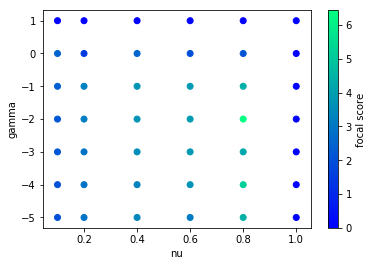

In [144]:
nu, gamma, sc = zip(*scores)
plt.scatter(nu, gamma, c=sc, cmap=plt.get_cmap('winter'))
plt.xlabel('nu')
plt.ylabel('gamma')
plt.colorbar(label='focal score')

# recall
recall = len(np.where(y_pred_test == 1)[0])/float(len(X_test))

# fraction of background samples with a positive classification
background_focal_frac = len(np.where(y_pred_background == 1)[0])/float(len(Xb_train))

imax = np.where(sc == np.max(sc))[0][0]
print('best parameters are: nu=%f, gamma=%f, with a score of %f'%(nu[imax], gamma[imax], sc[imax]))
print(recall, background_focal_frac)

0.7635658914728682 0.19208211143695014


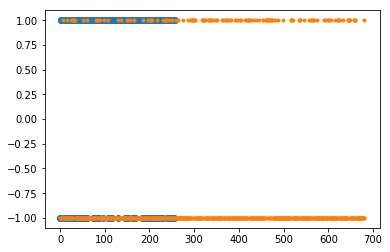

In [149]:
n = 0.2
g = -2

clf = svm.OneClassSVM(kernel="rbf", nu=n, gamma=10**g)
clf.fit(X_train)
y_pred_test = clf.predict(X_test)
y_pred_background = clf.predict(Xb_train)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(y_pred_test, 'o')
plt.plot(y_pred_background, '.')

recall = len(np.where(y_pred_test == 1)[0])/float(len(X_test))
background_focal_frac = len(np.where(y_pred_background == 1)[0])/float(len(Xb_train))
print(recall, background_focal_frac )

## Does this make sense? Seems to

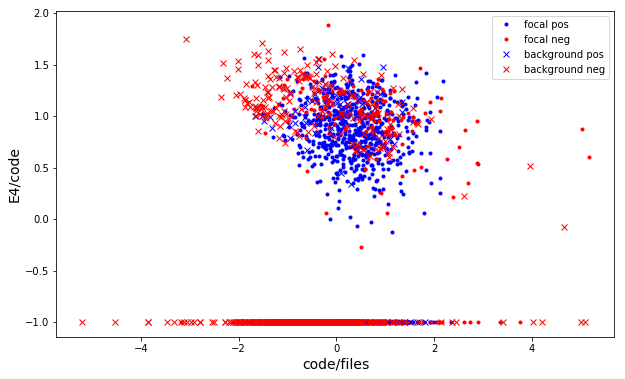

In [212]:
y_pred_train = clf.predict(X_train)
train_pos = y_pred_train == 1
train_neg = y_pred_train == -1
test_pos = y_pred_test == 1
test_neg = y_pred_test == -1
back_pos = y_pred_background == 1
back_neg = y_pred_background == -1

features = ['code/files','comment/code','test/code','readme/code','docstring/code',
            'E1/code','E2/code','E3/code',
            'E4/code','E5/code','E7/code',
            'W1/code','W2/code','W3/code','W6/code','code_lines']
fontsize = 14

x_ = 0
y_ = 8
plt.figure(figsize=(10,6))
plt.plot(X_train[train_pos, x_], X_train[train_pos, y_], '.', color='blue', label='focal pos')
plt.plot(X_test[test_pos, x_], X_test[test_pos, y_], '.', color='blue')
plt.plot(X_train[train_neg, x_], X_train[train_neg, y_], '.', color='red', label='focal neg')
plt.plot(X_test[test_neg, x_], X_test[test_neg, y_], '.', color='red')
plt.plot(Xb_train[back_pos, x_], Xb_train[back_pos, y_], 'x', color='blue', label='background pos')
plt.plot(Xb_train[back_neg, x_], Xb_train[back_neg, y_], 'x', color='red', label='background neg')
plt.xlabel(features[x_], fontsize=fontsize)
plt.ylabel(features[y_], fontsize=fontsize)
plt.legend()